## Track Features EDA
Looking 

In [1]:
import pandas as pd
import numpy as np
import re
import swifter #used to make pd.apply more efficient
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn

In [2]:
tracks_df = pd.read_csv('/Users/mariamtamer/VSCodeProjects/lyricalanalysis/data/all_tracks_cleaned.csv')

In [3]:
tracks_df.head()

,track_uri,track_name,cleaned_track_name,track_artists,featured_artists,track_is_explicit,track_popularity,track_genres,track_duration_ms,track_time_signature,...,track_valence,track_lyrics,lyrics_page_views,track_number,album_name,album_artist,album_release_date,album_popularity,album_record_label,album_cover
0,spotify:track:2HSmyk2qMN8WQjuGhaQgCk,Champagne Poetry,Champagne Poetry,"('Drake',)",NaN,True,82,"('hip hop', 'pop', 'rap')",336511,4.0,...,0.496,"Champagne Poetry Lyrics\n\nI love you, I love ...",688853.0,1,Certified Lover Boy,Drake,2021-09-03,95,OVO,https://i.scdn.co/image/ab67616d00001e02cd945b...
1,spotify:track:6jy9yJfgCsMHdu2Oz4BGKX,Papi’s Home,Papi’s Home,"('Drake',)",NaN,True,76,"('hip hop', 'pop', 'rap')",178623,4.0,...,0.588,Papi’s Home Lyrics\nI know that I hurt you\nYe...,445883.0,2,Certified Lover Boy,Drake,2021-09-03,95,OVO,https://i.scdn.co/image/ab67616d00001e02cd945b...
2,spotify:track:37Nqx7iavZpotJSDXZWbJ3,Girls Want Girls (with Lil Baby),NaN,"('Drake', 'Lil Baby')",NaN,True,86,"('hip hop', 'pop', 'rap', 'trap')",221979,4.0,...,0.381,NaN,NaN,3,Certified Lover Boy,Drake,2021-09-03,95,OVO,https://i.scdn.co/image/ab67616d00001e02cd945b...
3,spotify:track:61S79KIVA4I9FXbnsylEHT,In The Bible (with Lil Durk & Giveon),In The Bible,"('Drake', 'Lil Durk', 'Giveon')","('GIVĒON', 'Lil Durk')",True,79,"('hip hop', 'pop', 'rap', 'drill', 'trap', 'r&b')",296568,4.0,...,0.147,"In The Bible Lyrics\nOkay, okay, okay\nCountin...",439186.0,4,Certified Lover Boy,Drake,2021-09-03,95,OVO,https://i.scdn.co/image/ab67616d00001e02cd945b...
4,spotify:track:4VCbgIdr8ptegWeJpqLVHH,Love All (with JAY-Z),NaN,"('Drake', 'JAY-Z')",NaN,True,77,"('hip hop', 'pop', 'rap')",228461,4.0,...,0.155,NaN,NaN,5,Certified Lover Boy,Drake,2021-09-03,95,OVO,https://i.scdn.co/image/ab67616d00001e02cd945b...


In [8]:
top_tracks = tracks_df.sort_values('track_popularity', ascending = False).head(500)
top_tracks.head()

,track_uri,track_name,cleaned_track_name,track_artists,featured_artists,track_is_explicit,track_popularity,track_genres,track_duration_ms,track_time_signature,...,track_valence,track_lyrics,lyrics_page_views,track_number,album_name,album_artist,album_release_date,album_popularity,album_record_label,album_cover
13697,spotify:track:6Uj1ctrBOjOas8xZXGqKk4,Woman,Woman,"('Doja Cat',)",NaN,True,97,"('dance pop', 'pop')",172626,4.0,...,0.881,"Woman Lyrics\nHey, woman\nHey, woman\n\nWoman\...",569976.0,1,Planet Her,Doja Cat,2021-06-25,98,Kemosabe Records/RCA Records,https://i.scdn.co/image/ab67616d00001e024df324...
21272,spotify:track:0e8nrvls4Qqv5Rfa2UhqmO,THATS WHAT I WANT,THATS WHAT I WANT,"('Lil Nas X',)",NaN,True,97,"('hip hop', 'pop')",143901,4.0,...,0.207,"THATS WHAT I WANT Lyrics\nOne, two, three, fou...",448473.0,4,MONTERO,Lil Nas X,2021-09-17,95,Columbia,https://i.scdn.co/image/ab67616d00001e02be8267...
281,spotify:track:3rmo8F54jFF8OgYsqTxm5d,Bad Habits,Bad Habits,"('Ed Sheeran',)",NaN,False,96,"('pop',)",230746,4.0,...,0.537,"Bad Habits Lyrics\n(One, two, three, four)\nOo...",1037302.0,4,=,Ed Sheeran,2021-10-29,96,Atlantic Records UK,https://i.scdn.co/image/ab67616d00001e02ef24c3...
279,spotify:track:50nfwKoDiSYg8zOCREWAm5,Shivers,Shivers,"('Ed Sheeran',)",NaN,False,96,"('pop',)",207853,4.0,...,0.822,Shivers Lyrics\nI took an arrow to the heart\n...,358667.0,2,=,Ed Sheeran,2021-10-29,96,Atlantic Records UK,https://i.scdn.co/image/ab67616d00001e02ef24c3...
22762,spotify:track:4ZtFanR9U6ndgddUvNcjcG,good 4 u,​good 4 u,"('Olivia Rodrigo',)",NaN,True,96,"('pop',)",178146,4.0,...,0.800,"​good 4 u Lyrics\n(Ah)\n\nWell, good for you, ...",2485120.0,6,SOUR,Olivia Rodrigo,2021-05-21,100,Olivia Rodrigo PS,https://i.scdn.co/image/ab67616d00001e02a91c10...


In [10]:
def time_in_minutes(duration):
    seconds = duration/1000
    minutes = seconds/60
    return minutes

tracks_df['track_duration_minutes'] = tracks_df['track_duration_ms'].map(time_in_minutes)
tracks_df.head()

,track_uri,track_name,cleaned_track_name,track_artists,featured_artists,track_is_explicit,track_popularity,track_genres,track_duration_ms,track_time_signature,...,track_lyrics,lyrics_page_views,track_number,album_name,album_artist,album_release_date,album_popularity,album_record_label,album_cover,track_duration_minutes
0,spotify:track:2HSmyk2qMN8WQjuGhaQgCk,Champagne Poetry,Champagne Poetry,"('Drake',)",NaN,True,82,"('hip hop', 'pop', 'rap')",336511,4.0,...,"Champagne Poetry Lyrics\n\nI love you, I love ...",688853.0,1,Certified Lover Boy,Drake,2021-09-03,95,OVO,https://i.scdn.co/image/ab67616d00001e02cd945b...,5.608517
1,spotify:track:6jy9yJfgCsMHdu2Oz4BGKX,Papi’s Home,Papi’s Home,"('Drake',)",NaN,True,76,"('hip hop', 'pop', 'rap')",178623,4.0,...,Papi’s Home Lyrics\nI know that I hurt you\nYe...,445883.0,2,Certified Lover Boy,Drake,2021-09-03,95,OVO,https://i.scdn.co/image/ab67616d00001e02cd945b...,2.977050
2,spotify:track:37Nqx7iavZpotJSDXZWbJ3,Girls Want Girls (with Lil Baby),NaN,"('Drake', 'Lil Baby')",NaN,True,86,"('hip hop', 'pop', 'rap', 'trap')",221979,4.0,...,NaN,NaN,3,Certified Lover Boy,Drake,2021-09-03,95,OVO,https://i.scdn.co/image/ab67616d00001e02cd945b...,3.699650
3,spotify:track:61S79KIVA4I9FXbnsylEHT,In The Bible (with Lil Durk & Giveon),In The Bible,"('Drake', 'Lil Durk', 'Giveon')","('GIVĒON', 'Lil Durk')",True,79,"('hip hop', 'pop', 'rap', 'drill', 'trap', 'r&b')",296568,4.0,...,"In The Bible Lyrics\nOkay, okay, okay\nCountin...",439186.0,4,Certified Lover Boy,Drake,2021-09-03,95,OVO,https://i.scdn.co/image/ab67616d00001e02cd945b...,4.942800
4,spotify:track:4VCbgIdr8ptegWeJpqLVHH,Love All (with JAY-Z),NaN,"('Drake', 'JAY-Z')",NaN,True,77,"('hip hop', 'pop', 'rap')",228461,4.0,...,NaN,NaN,5,Certified Lover Boy,Drake,2021-09-03,95,OVO,https://i.scdn.co/image/ab67616d00001e02cd945b...,3.807683


In [14]:
top_tracks = tracks_df.sort_values('track_duration_minutes', ascending = False).head(500)
top_tracks

,track_uri,track_name,cleaned_track_name,track_artists,featured_artists,track_is_explicit,track_popularity,track_genres,track_duration_ms,track_time_signature,...,track_lyrics,lyrics_page_views,track_number,album_name,album_artist,album_release_date,album_popularity,album_record_label,album_cover,track_duration_minutes
134856,spotify:track:2vU6kbZI3bLM6ASsnSe11J,Until One,NaN,"('Swedish House Mafia',)",NaN,False,0,"('dance pop', 'edm', 'electro house', 'pop', '...",4794398,4.0,...,NaN,NaN,1,Until One,Swedish House Mafia,2010-01-01,0,Virgin,https://i.scdn.co/image/ab67616d00001e02c4c106...,79.906633
25974,spotify:track:6a5WY5noWtocG3uvK0YhnV,Continuous Mix,NaN,"('Tiësto',)",NaN,False,0,"('big room', 'brostep', 'dance pop', 'edm', 'h...",4777826,4.0,...,NaN,NaN,16,In Search Of Sunrise 3 - Panama,Tiësto,2003,33,Songbird,https://i.scdn.co/image/ab67616d00001e027b7a93...,79.630433
25433,spotify:track:6qBPdCvbixc1lm5yTJQdkJ,"Continuous Mix Nyana, mix 2",NaN,"('Tiësto',)",NaN,False,0,"('big room', 'brostep', 'dance pop', 'edm', 'h...",4737986,4.0,...,NaN,NaN,30,Nyana,Tiësto,2010-11-01,33,Black Hole Recordings,https://i.scdn.co/image/ab67616d00001e023e75bc...,78.966433
25887,spotify:track:5JBYgl5qIfOQrtg8NFDjCL,Continuous Mix 1,NaN,"('Tiësto',)",NaN,False,0,"('big room', 'brostep', 'dance pop', 'edm', 'h...",4684626,4.0,...,NaN,NaN,29,In Search Of Sunrise 6 - Ibiza,Tiësto,2007-09-07,36,Songbird,https://i.scdn.co/image/ab67616d00001e020ce2a6...,78.077100
25611,spotify:track:3ZCfB5mAgWYJsft0an1FOb,Continuous Mix 1,NaN,"('Tiësto',)",NaN,False,0,"('big room', 'brostep', 'dance pop', 'edm', 'h...",4669720,4.0,...,NaN,NaN,29,In Search Of Sunrise 4 - Latin America,Tiësto,2009-11-16,33,Songbird,https://i.scdn.co/image/ab67616d00001e026a6ded...,77.828667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27298,spotify:track:3nB82yGjtbQFSU0JLAwLRH,Not a Bad Thing,Not a Bad Thing,"('Justin Timberlake',)",NaN,True,61,"('dance pop', 'pop')",688453,4.0,...,Not a Bad Thing Lyrics\nSaid all I want from y...,207777.0,11,The 20/20 Experience - 2 of 2 (Deluxe),Justin Timberlake,2013-09-27,62,RCA Records Label,https://i.scdn.co/image/ab67616d00001e0231dc01...,11.474217
136536,spotify:track:2cTOlcHulTsu9i0JjLgI42,Sex Me (Part I) / Sex Me (Part II),Sex Me (Part I) / Sex Me (Part II),"('R. Kelly',)",NaN,False,45,(),687493,4.0,...,"Sex Me (Part I) / Sex Me (Part II) LyricsBaby,...",NaN,11,12 Play,R. Kelly,1993-11-07,59,Jive,https://i.scdn.co/image/ab67616d00001e02b0369e...,11.458217
31506,spotify:track:4A0oGykvqU944YwUvY5pJj,Midnight Rambler - Live At The Roundhouse / 1971,Midnight Rambler (Live At The Roundhouse / 1971),"('The Rolling Stones',)",NaN,False,22,"('british invasion', 'rock')",686693,4.0,...,Midnight Rambler (Live At The Roundhouse / 197...,NaN,9,Sticky Fingers (Super Deluxe),The Rolling Stones,1971-04-23,44,Polydor Records,https://i.scdn.co/image/ab67616d00001e0221c5b3...,11.444883
31486,spotify:track:1XudeTABHeEFSMo0Nvuj7E,Midnight Rambler - Live At The Roundhouse / 1971,Midnight Rambler (Live At The Roundhouse / 1971),"('The Rolling Stones',)",NaN,False,29,"('british invasion', 'rock')",686693,4.0,...,Midnight Rambler (Live At The Roundhouse / 197...,NaN,9,Sticky Fingers (Deluxe),The Rolling Stones,1971-04-23,54,Polydor Records,https://i.scdn.co/image/ab67616d00001e02141291...,11.444883


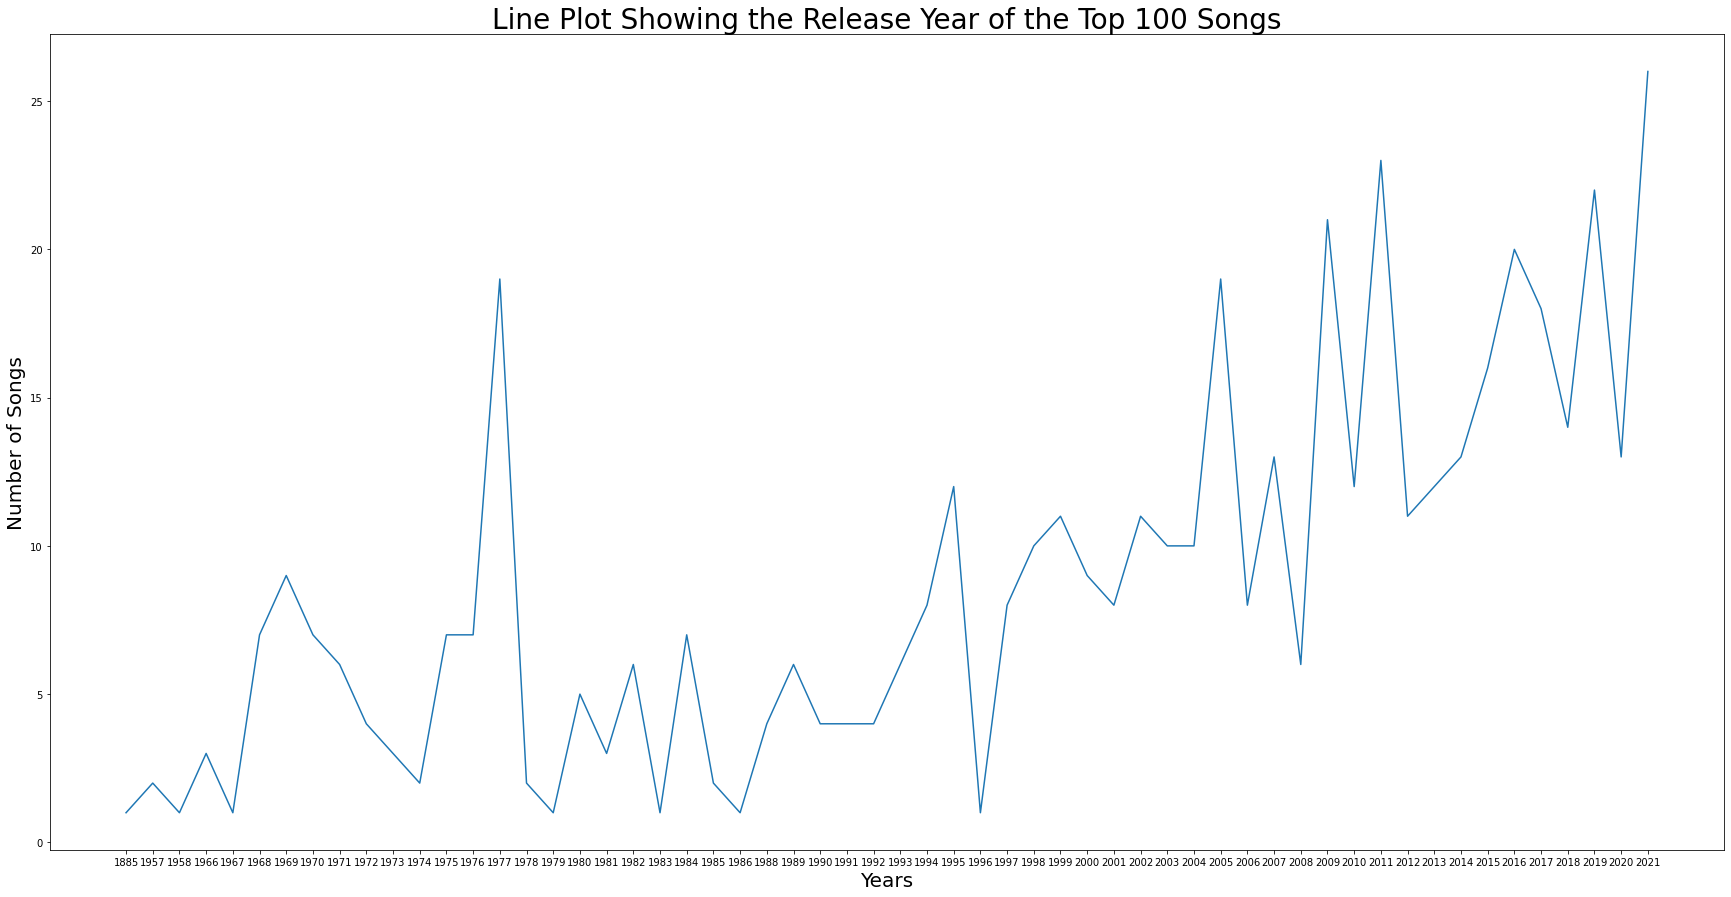

In [22]:
album_release_years = top_tracks['album_release_date'].map(lambda x: x[:4])
top_tracks['album_release_year'] = album_release_years
y = top_tracks.groupby(['album_release_year']).count()['track_uri'].values
plt.figure(figsize=(30,15))
plt.title('Line Plot Showing the Release Year of the Top 100 Songs',fontsize=28)
plt.xlabel('Years', fontsize=20)
plt.ylabel('Number of Songs', fontsize=20)

plt.plot(top_tracks.groupby(['album_release_year']).count().index, y)